## Chargement et préparation des données


In [4]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from scripts.features.processing import filter_and_analyze_dataset
from scripts.visualization.data_quality_viz import plot_data_quality_dashboard
from scripts.features.selection import analyze_and_select_features
from scripts.data.analysis import analyze_data_quality

df = pd.read_csv('../full_datas.csv', 
                 sep='\t',
                 encoding='utf-8',
                 low_memory=False,
                 on_bad_lines='skip',
                 nrows=10000)

Module de visualisation non disponible
Colonnes numériques : 13
Colonnes ordinales : 1
Colonnes nominales : 1
Colonnes supprimées : 192
Colonnes optimisées : 4

Variables supprimées pour cause de forte corrélation:
- sodium_100g
- energy_100g
- fat_100g
- sugars_100g


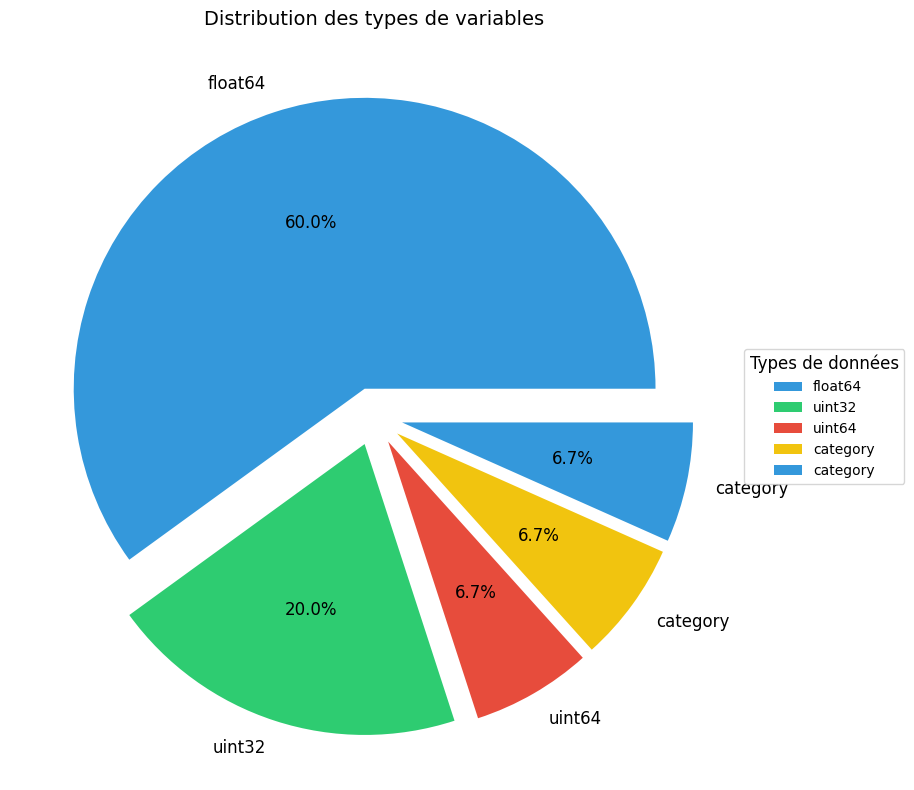

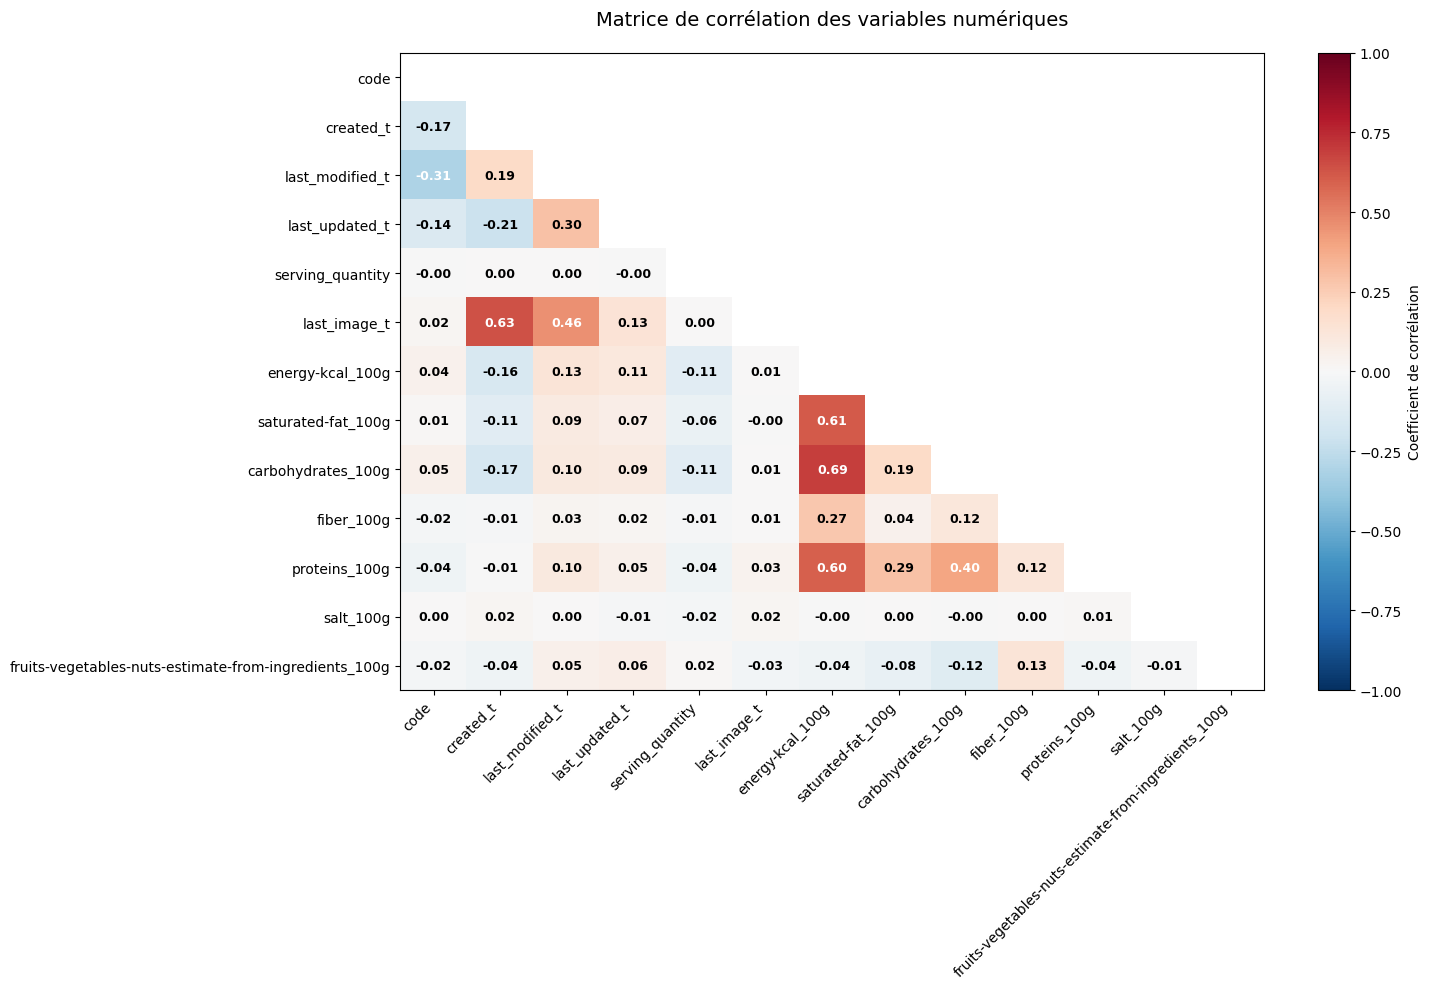

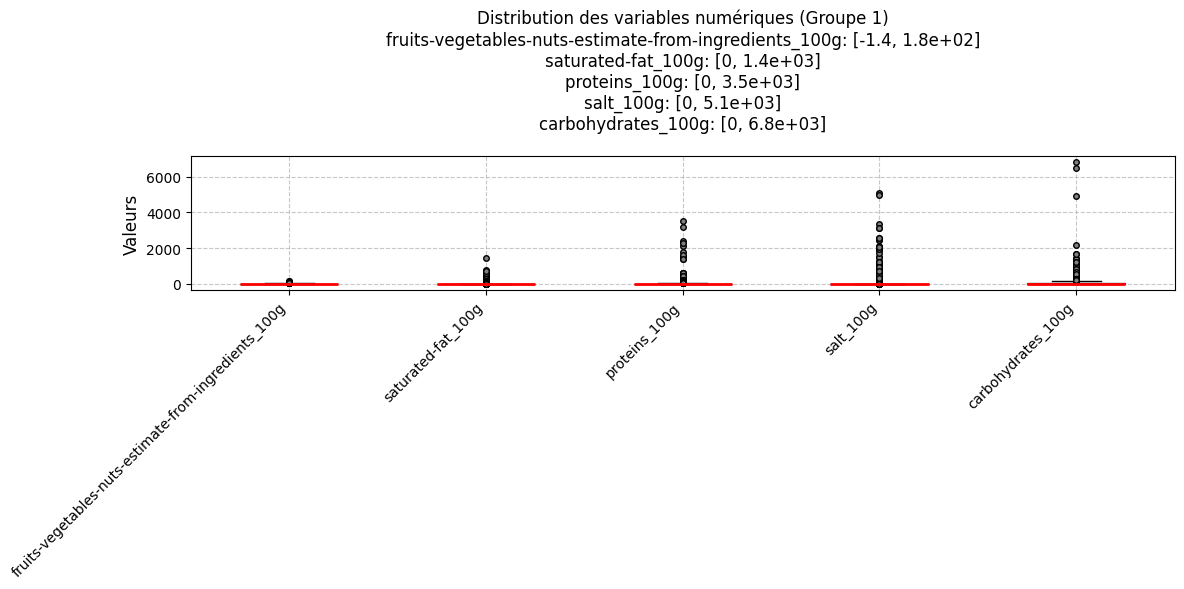


Statistiques détaillées pour le groupe 1

fruits-vegetables-nuts-estimate-from-ingredients_100g:
  Moyenne: 20
  Écart-type: 32
  Min: -1.4
  Max: 1.8e+02
  Nombre de valeurs non-nulles: 53824

saturated-fat_100g:
  Moyenne: 6.1
  Écart-type: 19
  Min: 0
  Max: 1.4e+03
  Nombre de valeurs non-nulles: 72285

proteins_100g:
  Moyenne: 10
  Écart-type: 32
  Min: 0
  Max: 3.5e+03
  Nombre de valeurs non-nulles: 80451

salt_100g:
  Moyenne: 2.4
  Écart-type: 49
  Min: 0
  Max: 5.1e+03
  Nombre de valeurs non-nulles: 72447

carbohydrates_100g:
  Moyenne: 42
  Écart-type: 77
  Min: 0
  Max: 6.8e+03
  Nombre de valeurs non-nulles: 80736


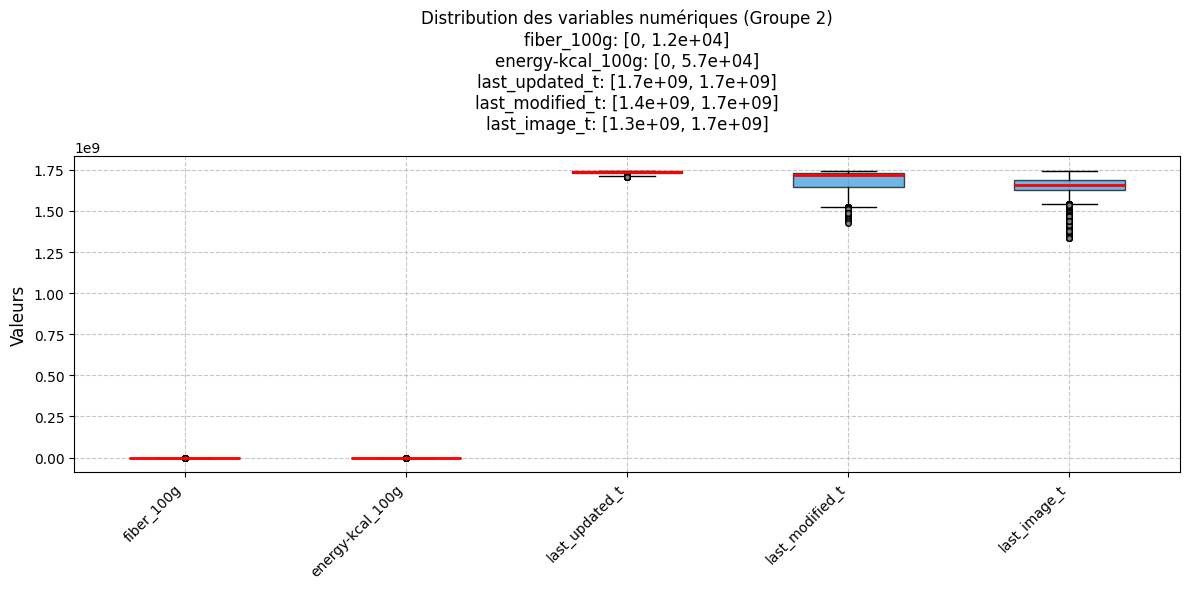


Statistiques détaillées pour le groupe 2

fiber_100g:
  Moyenne: 4
  Écart-type: 49
  Min: 0
  Max: 1.2e+04
  Nombre de valeurs non-nulles: 60295

energy-kcal_100g:
  Moyenne: 3.5e+02
  Écart-type: 6.3e+02
  Min: 0
  Max: 5.7e+04
  Nombre de valeurs non-nulles: 80895

last_updated_t:
  Moyenne: 1.7e+09
  Écart-type: 1.1e+07
  Min: 1.7e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 100000

last_modified_t:
  Moyenne: 1.7e+09
  Écart-type: 5.9e+07
  Min: 1.4e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 100000

last_image_t:
  Moyenne: 1.7e+09
  Écart-type: 5.4e+07
  Min: 1.3e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 50026


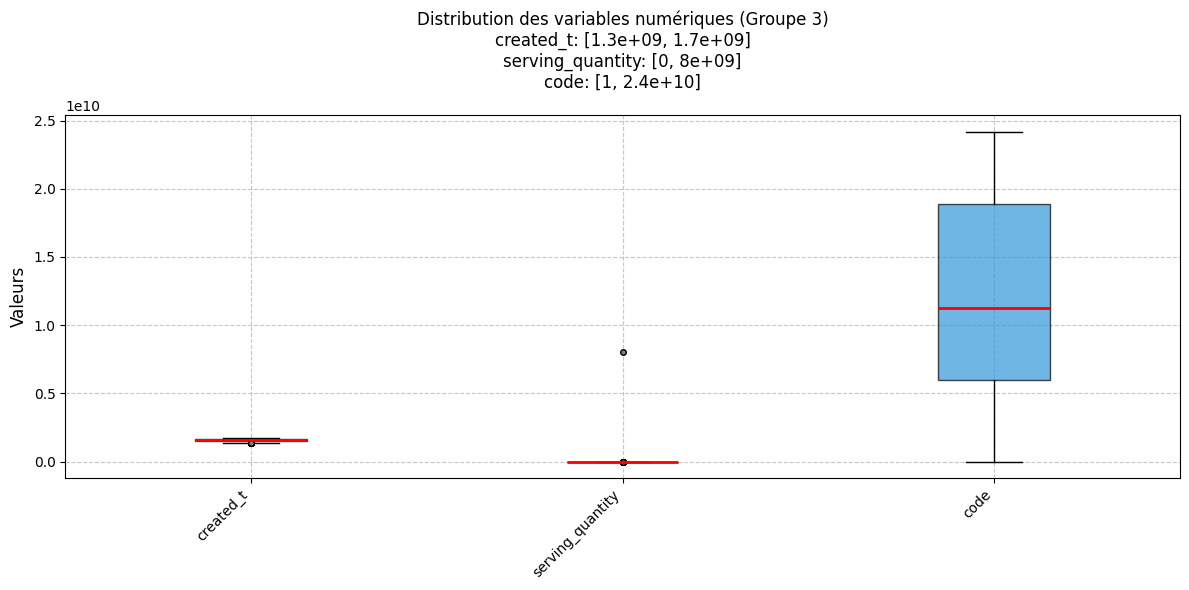


Statistiques détaillées pour le groupe 3

created_t:
  Moyenne: 1.6e+09
  Écart-type: 8.1e+07
  Min: 1.3e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 100000

serving_quantity:
  Moyenne: 1.3e+05
  Écart-type: 3.3e+07
  Min: 0
  Max: 8e+09
  Nombre de valeurs non-nulles: 60174

code:
  Moyenne: 1.2e+10
  Écart-type: 7.6e+09
  Min: 1
  Max: 2.4e+10
  Nombre de valeurs non-nulles: 100000

Résumé de la qualité des données:
Dimensions: 100000 lignes, 15 colonnes
Types de données: float64: 9, uint32: 3, uint64: 1, category: 1, category: 1
Colonnes avec valeurs manquantes: 11

Résumé des modifications :
Dimensions initiales : (100000, 207)
Dimensions finales : (100000, 15)

Colonnes conservées :
- code: uint64
- created_t: uint32
- last_modified_t: uint32
- last_updated_t: uint32
- serving_quantity: float64
- nutriscore_grade: category
- pnns_groups_1: category
- last_image_t: float64
- energy-kcal_100g: float64
- saturated-fat_100g: float64
- carbohydrates_100g: float64
- fiber_100g: 

In [5]:
# Configuration des paramètres
params = {
    'max_categories': 30,
    'min_unique_ratio': 0.01,
    'missing_threshold': 0.5,
    'correlation_threshold': 0.7
}

# Application de la fonction
df_filtered, analysis_report = analyze_and_select_features(df, **params)

# Création du rapport de qualité
quality_report = analyze_data_quality(df_filtered)

# Visualisation des résultats essentiels
plot_data_quality_dashboard(df_filtered, quality_report)

# Afficher un résumé des modifications
print("\nRésumé des modifications :")
print(f"Dimensions initiales : {df.shape}")
print(f"Dimensions finales : {df_filtered.shape}")

# Afficher les colonnes restantes et leurs types
print("\nColonnes conservées :")
for col, dtype in df_filtered.dtypes.items():
    print(f"- {col}: {dtype}")

# Save csv in data/reduced/full_datas_100k.csv
# Créer le dossier data/reduced s'il n'existe pas
import os
os.makedirs('../data/reduced', exist_ok=True)

# Sauvegarder le DataFrame filtré
output_path = '../data/reduced/full_datas_10k.csv'
df_filtered.to_csv(output_path, index=False, sep='\t')
print(f"\nDonnées filtrées sauvegardées dans : {output_path}")
